In [109]:
#Problem
#Company wants to automate the loan eligibility process (real time) based on customer detail 
#provided while filling online application form. 
#These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
#To automate this process, they have given a problem to identify the customers segments, those are eligible 
#for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [110]:
#Data
#Variable(Descriptions): Loan_ID(Unique Loan ID), Gender(M/F), Married, Dependents, Education (Graduate/Under Graduate),
#Self_Employed, Applicant income, CoapplicantIncome, LoanAmount (in thousands), Loan_Amount_Term (in months), 
#Credit_History(credit history meets guidelines),Property_Area (Urban/Semi Urban/Rural), Loan_Status(Y/N)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
train = pd.read_csv("train.csv")

In [113]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


So, LoanAmount has 22 missing values.

Loan_Amount_Term has 14 missing values.

Credit_History has 50 missing values.

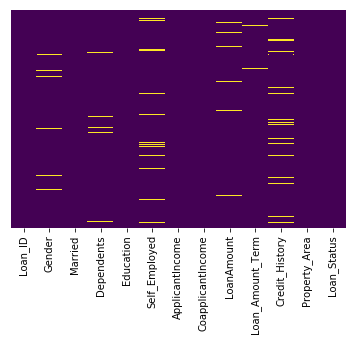

In [116]:
#Finding the locations of the missing data
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
#Yellow dash represents missing points

Hence, among the non-numeric columns Gender, Dependents, Self_Employed also have missing values.

In [117]:
print(train['Gender'].isna().sum())
print(train['Dependents'].isna().sum())
print(train['Self_Employed'].isna().sum())

13
15
32


Hence, Gender has 13, Dependents has 15 and Self_Employed has 32 missing values

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


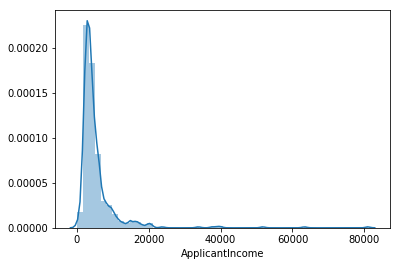

In [118]:
sns.distplot(train['ApplicantIncome'])

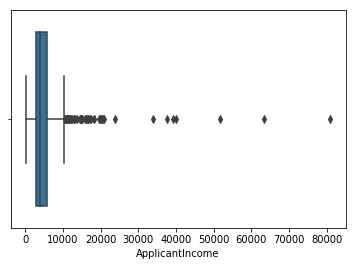

In [119]:
sns.boxplot(train['ApplicantIncome'])

Hence, there are few extreme values when it comes to the Applicant Income. But, the majority of applicants have income within 20000.

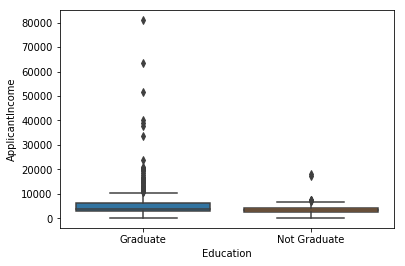

In [120]:
sns.boxplot(y='ApplicantIncome', data=train, x='Education')

Hence, there is no substantial difference between the mean income of graduates and non-graduates.

But there are many graduates with high income.

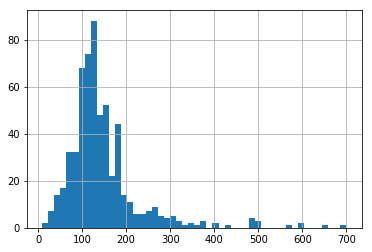

In [121]:
train['LoanAmount'].hist(bins=50)

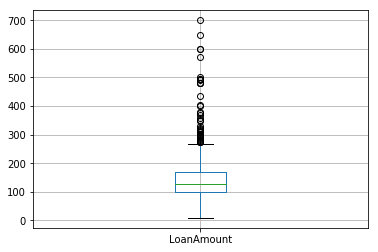

In [122]:
train.boxplot(column='LoanAmount')

Here, there are some extreme values. And LoanAmount also has some missing values. So, we need to clean the data.

In [123]:
#Frequence table for credit history
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [124]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

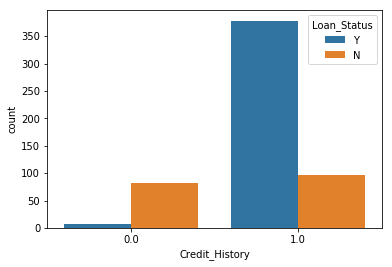

In [125]:
#Probability of getting loan by credit history
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)

Hence, chances of getting a loan are eight-fold if the applicant has a valid credit history.

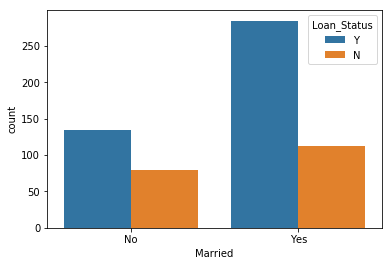

In [126]:
#Getting loan by marriage status
sns.countplot(x='Married', hue='Loan_Status', data=train)

Hence, chances of getting loan are much more if the person is married.

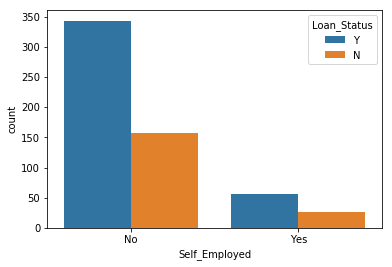

In [127]:
#Getting loan by Self-Employed status
sns.countplot(data=train, x='Self_Employed', hue='Loan_Status')

Hence, chances of getting loan are much more if the person is not self-employed

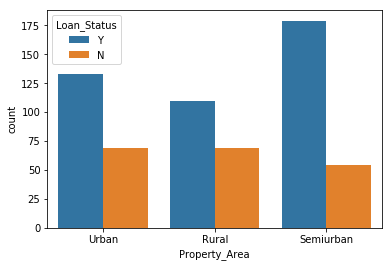

In [128]:
#Getting loan by Property_Area
sns.countplot(data=train, x='Property_Area', hue='Loan_Status')

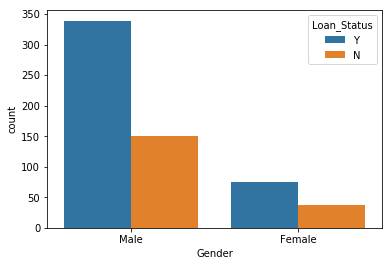

In [129]:
#Getting loan by Gender
sns.countplot(data=train, x='Gender', hue='Loan_Status')

# Data Cleaning

In [130]:
#Missing values in all columns
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
train['Self_Employed'].fillna('No', inplace=True)

In [132]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

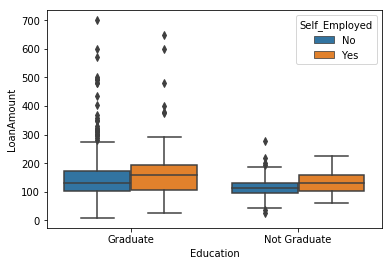

In [133]:
sns.boxplot(data = train, x='Education', hue='Self_Employed', y='LoanAmount')

In [134]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [135]:
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [136]:
# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [137]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

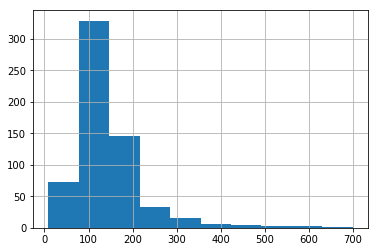

In [138]:
train['LoanAmount'].hist()

In [139]:
train['LoanAmountLog'] = np.log(train['LoanAmount'])

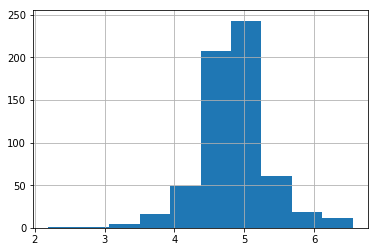

In [140]:
train['LoanAmountLog'].hist()

Combining both Applicant Income and Coapplicant Income to get Total Income

In [141]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

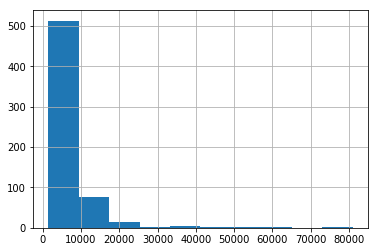

In [142]:
train['TotalIncome'].hist()

In [143]:
train['Ratio'] = train['LoanAmount']/train['TotalIncome']

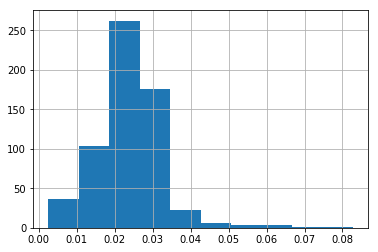

In [144]:
train['Ratio'].hist()

In [145]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmountLog         0
TotalIncome           0
Ratio                 0
dtype: int64

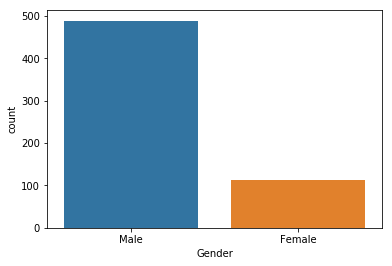

In [146]:
sns.countplot(data=train, x='Gender')

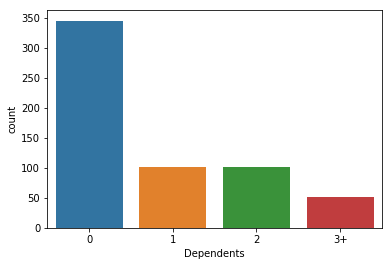

In [147]:
sns.countplot(data=train, x='Dependents')

In [148]:
train['Dependents'].fillna('0', inplace=True)

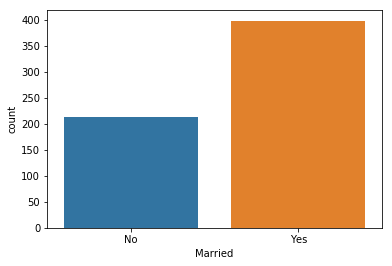

In [149]:
sns.countplot(data=train, x='Married')

Hence, the ratio between married and non-married applicants is ~0.5. So, we can't directly impute values.

In [150]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [151]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [152]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmountLog        0
TotalIncome          0
Ratio                0
dtype: int64

In [154]:
sex = pd.get_dummies(train['Gender'], drop_first=True)
married = pd.get_dummies(train['Married'], drop_first=True)

In [155]:
dependents = pd.get_dummies(train['Dependents'], drop_first=True)
self_employed = pd.get_dummies(train['Self_Employed'], drop_first=True)

In [156]:
train = pd.concat([train,sex,married], axis=1)

In [159]:
train.rename(columns={"Yes":"Married Yes"}, inplace=True)

In [162]:
train = pd.concat([train,dependents, self_employed], axis=1)

In [164]:
train.rename(columns={"Yes":"Self-Employed Yes"}, inplace=True)

In [167]:
train.drop(columns=['Gender', 'Married', 'Dependents', 'Self_Employed'], inplace=True)

In [170]:
education = pd.get_dummies(train['Education'], drop_first=True)
propertyArea = pd.get_dummies(train['Property_Area'], drop_first=True)

In [171]:
train = pd.concat([train, education, propertyArea], axis=1)

In [173]:
train.drop(columns=['Education','Property_Area'], inplace=True)

In [175]:
train.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [178]:
loanStatus = pd.get_dummies(train['Loan_Status'], drop_first=True)

In [179]:
train = pd.concat([train, loanStatus], axis=1)

In [181]:
train.rename(columns={"Y":"LoanStatus Yes"}, inplace=True)

In [185]:
train.drop(columns=['Loan_ID', 'Loan_Status'], inplace=True)

In [187]:
train.head(5)

,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmountLog,TotalIncome,Ratio,Male,Married Yes,1,2,3+,Self-Employed Yes,Not Graduate,Semiurban,Urban,LoanStatus Yes
0,130.0,360.0,1.0,4.867534,5849.0,0.022226,1,0,0,0,0,0,0,0,1,1
1,128.0,360.0,1.0,4.852030,6091.0,0.021015,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,4.189655,3000.0,0.022000,1,1,0,0,0,1,0,0,1,1
3,120.0,360.0,1.0,4.787492,4941.0,0.024287,1,1,0,0,0,0,1,0,1,1
4,141.0,360.0,1.0,4.948760,6000.0,0.023500,1,0,0,0,0,0,0,0,1,1


# Building a Logistic Regression Model

In [188]:
X = train.drop('LoanStatus Yes', axis=1)

In [189]:
y = train['LoanStatus Yes']

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 101)

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
logmodel = LogisticRegression()

In [198]:
logmodel.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [199]:
predictions = logmodel.predict(X_test)

In [200]:
from sklearn.metrics import classification_report

In [201]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

   micro avg       0.78      0.78      0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



In [202]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 

In [203]:
confusion_matrix(y_test, predictions)

array([[ 26,  38],
       [  2, 119]], dtype=int64)

Hence, the logistic regression model attained accuracy of 82%